# Data Analysis & Model Preperation / Evaluation Assignment
###### By Emad Badawi

## Table of Contents<a id="1000"></a>

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Abstract](#1)<br>
2. [Business Understanding](#02)<br>
3. [Analytic Approach](#3)<br>
4. [Data Requirements](#04)<br>
5. [Data Collection](#5)<br>
6. [Data Understanding](#6)<br>
7. [Data Preparation](#7)<br>
8. [Data Modeling](#8)<br>
9. [Model Evaluation](#9)<br>
10. [Deployment & Feedback](#10)<br>

</div>
<hr>



##### Abstract:<a id="1"></a>
First, Thanks for taking the time to glance over my assignment and more importantly providing constructive feedback.
Since the question in place was very open with no clear definition of a "problem", I have proceeded with the following approach to solve such an open-end question:<br>
* The issue I presented could very possible be not novel
* My goal is to demonstrate my deep understanding of the process
* One of my course feedback for future improvement is to provide all datasets needed for each one of the three problem statments. It will add more value for all learners to see how others observed and analysed same set of data

[Main Menu](#1000)

-----------------------------------------
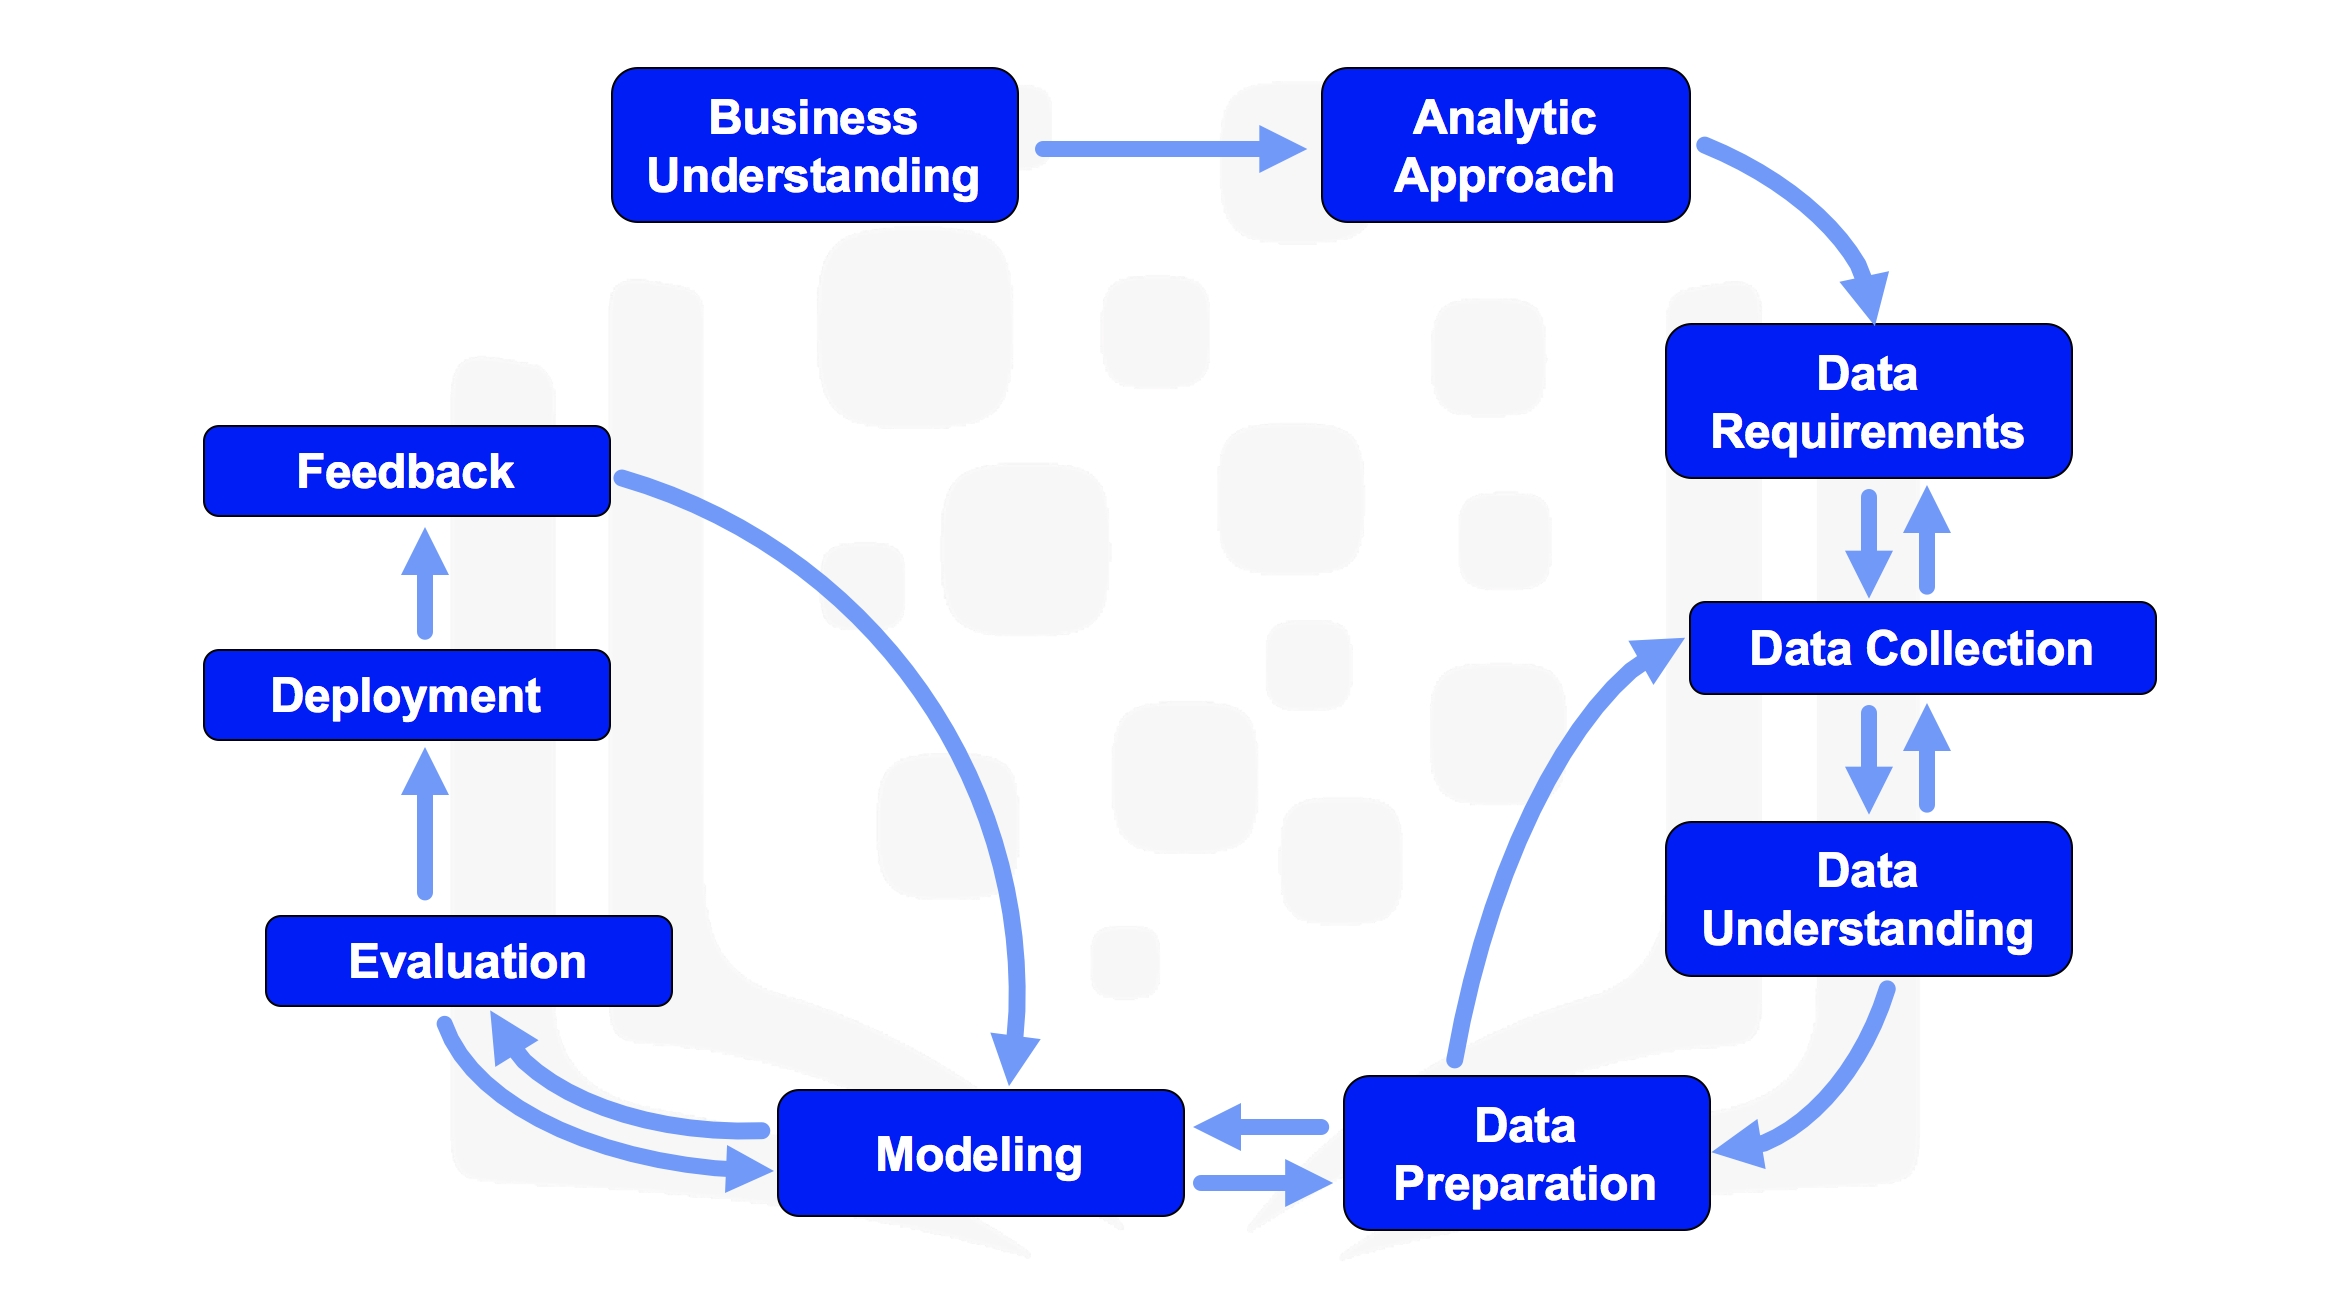

### Business Understanding:<a id="02"></a>
__Problem Statment__<br>
_Hospitals ERs are overwhelmed with patients who shows little to no symptoms of critical health issues which impacting the ERs effecincy and increase negative impact on patients with immediate need for help._<br>

[Main Menu](#1000)

--------------------------------------------------------------------
### Analytic Approach:<a id="3"></a>
_It is clear that ERs has some protocol in palce already to triage patients or else the problem statment should have never surfaced.<br>
Hospitals are required to hold ER walk-in patients for a minimum of 7 hours under monitoring for all cases (critical and noncritical).<br>
To better analyse this issue, and in our efforts trying to provide possible solution, we need to gain access to the following data:_<br>
* How many ER patients admitted on average per day @ hospitals in question (it could be one hospital, few or all hospitals on the national level)<br>
* How much Hospital/s charge per patient for ER admission?<br>
* How often Hospital/s usually overflow which could result in possible blockade of ER patient flow?<br>
* Will it make financial sense if hospital/s divert noncritical patients to the surrounding __urgent Care__ clinics located around main hospital/s ER just for monitoring?
* ER adminstration will only send patients younger than 55 years old for external clinics for monitoring __age will be one of the major analytic approachs__ as we are building the model root, and decission nodes

[Main Menu](#1000)

--------------------------------------------------
### Data Requirements:<a id="04"></a>
_for this assesment, we will need the following datasets:_
* Complete list of all hospitals with detailed address including zipcodes
* Complete list of stand-alone clinical centers with detailed address including zipcodes
* Complete list of historical data for all ER admittions across all hospitals including the following details for each patient:
    * _Age_
    * _ER admission protocol_
    * _Final assesment evaluation for the condition (Critical Y/N?)_

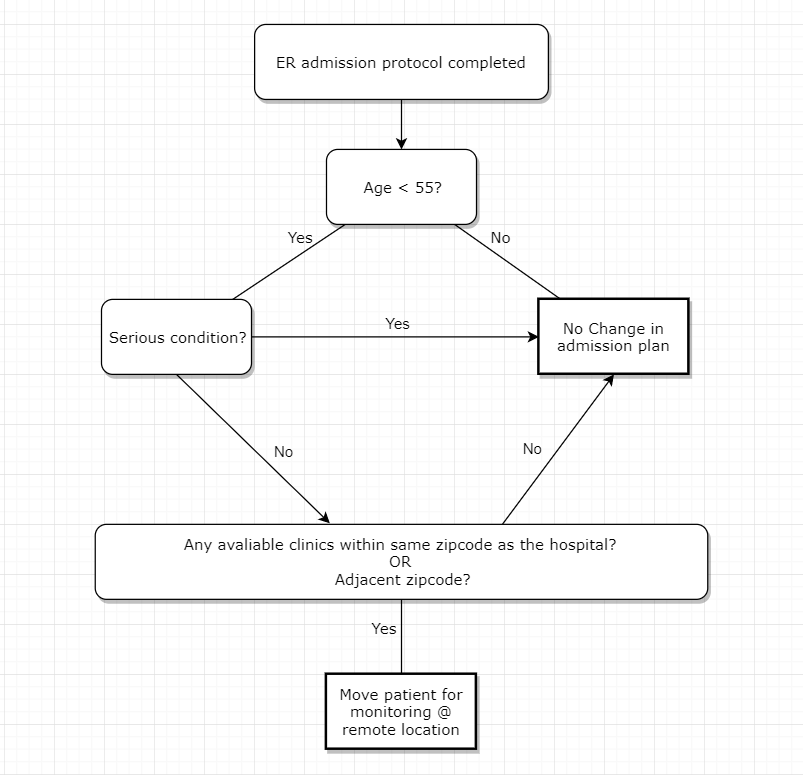

[Main Menu](#1000)

------------------------------
### Data Collection:<a id="5"></a>
Data will be collected from multiple public database archives. Please check the following links for sources evaluation / review:<br>
* <a href="https://data.world/datasets/hospital"><strong>data.world/datasets/hospital</strong></a><br>
* <a href="https://www.cdc.gov/nchs/fastats/emergency-department.htm"><strong>cdc.gov/emergency-department</strong></a><br>
* <a href="https://healthdata.gov/search?query=hospital&sort_by=changed&sort_order=DESC"><strong>healthdata.gov/search?query=hospital</strong></a><br>
* <a href="https://data.medicare.gov/data?tool=hospital-compare&tag=timely%20and%20effective%20care&sort=alpha&q="><strong>data.medicare.gov/data?tool=hospital-compare</strong></a><br>
* <a href="https://support.socrata.com/hc/en-us/articles/115010730868"><strong>support.socrata.com/hc/en-us/articles</strong></a><br>
* <a href="https://www.kaggle.com/gsdeepakkumar/hospitals-an-analysis"><strong>kaggle.com/gsdeepakkumar/hospitals-an-analysis</strong></a><br>
* <a href="https://www.kaggle.com/jaimeblasco/icu-beds-by-county-in-the-us"><strong>kaggle.com/jaimeblasco/icu-beds</strong></a><br>


[Main Menu](#1000)

----------------------------------
### Data Understanding:<a id="6"></a>

_Please note that I am still learning my way through Python, and I usually don't know exactly which library or packages I would possibly need to use in addition to the usual "pandas". Therefore, I tend to upload all possible libraries before I start writing code._

In [124]:
conda install pandas-datareader # I installed pandas-datareader since pandas.io.data was not working properly

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [125]:
conda install dask

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [128]:
import pandas as pd
pd.set_option('display.max_columns', None)
from pandas import DataFrame
import datetime
from pandas_datareader import data # I installed pandas-datareader since pandas.io.data was not working properly
from pandas.util.testing import *
import pickle
from dask import dataframe as dd
import numpy as np # import numpy library
from numpy import array
from array import *
import re # import library for regular expression
import random # library for random number generation
import matplotlib.pyplot as matplt
from matplotlib import *
import seaborn as sns
import pylab as plt
from pylab import *
import scipy.integrate as integrate
import math
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [129]:
df = pd.read_csv("all_hosp_lab.csv")
df

,ProviderID,TaxID,Lastname,Firstname,Middle,EntityName,Degree,ProvType,Address,City,State,Zip,Phone,BillingEntityName,BillingAddress,BillingCity,BillingState,BillingZip,BillingPhone,NPI,Specialty,EffDate,TermDate
0,P2221014407,208550806,MINUTE CLINIC,NaN,NaN,MINUTE CLINIC,NaN,A,978 BOYLSTON ST,NEWTON,MA,2461,8663892727,MINUTE CLINIC,978 BOYLSTON ST,NEWTON,MA,2461,8663892727,,URGENT CARE CENTER,2.01409e+07,
1,F7900012596,990280549,PAN PACIFIC PATHOLOGISTS LLC,NaN,NaN,PAN PACIFIC PATHOLOGISTS LLC,NaN,A,2228 LILIHA STREET # 201,HONOLULU,HI,96817,8085476151,PAN PACIFIC PATHOLOGISTS LLC,2228 LILIHA STREET # 201,HONOLULU,HI,96817,8085476151,,PATHOLOGY,2.01309e+07,
2,F7900008113,453305522,HOWARD UNIVERSITY DIALYSIS CEN,NaN,NaN,HOWARD UNIVERSITY DIALYSIS CEN,NaN,A,2041 GEORGIA AVENUE NW SUITE 1119B,WASHINGTON,DC,20060,2028657365,HOWARD UNIVERSITY DIALYSIS CEN,2041 GEORGIA AVENUE NW SUITE 1119B,WASHINGTON,DC,20060,2028657365,,DIALYSIS SERVICES,2.01203e+07,
3,P2220000628,330844408,DEL AMO DIAGNOSTIC CENTER,NaN,NaN,DEL AMO DIAGNOSTIC CENTER,NaN,A,3531 FASHION WAY,TORRANCE,CA,90503,3102142424,DEL AMO DIAGNOSTIC CENTER,3531 FASHION WAY,TORRANCE,CA,90503,3102142424,,RADIOLOGY/IMAGING/MAMMOGRAPHY,2.01304e+07,
4,P2220757964,42443256,NEW ENGLAND REHABILITATION CEN,NaN,NaN,NEW ENGLAND REHABILITATION CEN,NaN,H,463 WORCESTER RD STE 102,FRAMINGHAM,MA,1701,5088201208,NEW ENGLAND REHABILITATION CEN,463 WORCESTER RD STE 102,FRAMINGHAM,MA,1701,5088201208,,REHABILITATION SERVICES,2.01304e+07,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443941,F7800054292,454731589,FLORIDA APNEA DIAGNOSTICS LLC,NaN,NaN,FLORIDA APNEA DIAGNOSTICS LLC,MD,S,2664 CYPRESS RIDGE BLVD #101,WESLEY CHAPEL,FL,33544,8132795012,"FLORIDA APNEA , DIAGNOSTIC S",2664 CYPRESS RIDGE BLVD #101,WESLEY CHAPEL,FL,33544,8132795012,,SLEEP DISORDER CENTER,2.01704e+07,
443942,F7800054293,454731589,FLORIDA APNEA DIAGNOSTICS LLC,NaN,NaN,FLORIDA APNEA DIAGNOSTICS LLC,MD,S,4202 W LINEBAUGH AVE,TAMPA,FL,33624,8132795012,"FLORIDA APNEA , DIAGNOSTIC S",4202 W LINEBAUGH AVE,TAMPA,FL,33624,8132795012,,SLEEP DISORDER CENTER,2.01704e+07,
443943,F7800054294,454731589,"FAD SLEEP,",NaN,NaN,"FAD SLEEP,",MD,S,2664 CYPRESS RIDGE BLVD #101,WESLEY CHAPEL,FL,33544,8132795012,"FAD SLEEP,",2664 CYPRESS RIDGE BLVD #101,WESLEY CHAPEL,FL,33544,8132795012,,SLEEP DISORDER CENTER,2.01704e+07,
443944,F7800054295,454731589,"FAD SLEEP,",NaN,NaN,"FAD SLEEP,",MD,S,4202 W LINEBAUGH AVE,TAMPA,FL,33624,8132795012,"FAD SLEEP,",4202 W LINEBAUGH AVE,TAMPA,FL,33624,8132795012,,SLEEP DISORDER CENTER,2.01704e+07,


___The dataset is not clean, as we can see above, Columns (3,4,6,11,12,17,18,21) have mixed types___<br>
We will do furthur look into all mentioned columns to ensure that we have a clean dataset before we build our model.<br>
However, before we spend time and efforts on cleaning data, we shall first build a frame of only needed columns. Then we can clean the data in these columns. It does not make sense to clean any data which we will not use for this particular model.

[Main Menu](#1000)

--------------------------------------

### Data Preperation:<a id="7"></a>

<br>__Following are the headers list on the dataset__<br>

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443946 entries, 0 to 443945
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ProviderID         443946 non-null  object
 1   TaxID              443946 non-null  int64 
 2   Lastname           443945 non-null  object
 3   Firstname          190176 non-null  object
 4   Middle             119834 non-null  object
 5   EntityName         443946 non-null  object
 6   Degree             357520 non-null  object
 7   ProvType           443946 non-null  object
 8   Address            443946 non-null  object
 9   City               443946 non-null  object
 10  State              443946 non-null  object
 11  Zip                443946 non-null  object
 12  Phone              443946 non-null  object
 13  BillingEntityName  443946 non-null  object
 14  BillingAddress     443946 non-null  object
 15  BillingCity        443934 non-null  object
 16  BillingState       4

__The following columns will be needed for this assesment:__
* Lastname
* EntityName
* Address
* City
* State
* Zip<br>
Later on, both columns "__Lastname__" and "__EntityName__" will be crossed refrenced and merged into one column only "_Provider_"<br>Also, There will be an additional column "_Type_" to defrentiate "__Major Hospitals = 1__" from "__Urgent Care Clinics = 0__"

In [131]:
df.columns

Index(['ProviderID', 'TaxID', 'Lastname', 'Firstname', 'Middle', 'EntityName',
       'Degree', 'ProvType', 'Address', 'City', 'State', 'Zip', 'Phone',
       'BillingEntityName', 'BillingAddress', 'BillingCity', 'BillingState',
       'BillingZip', 'BillingPhone', 'NPI', 'Specialty', 'EffDate',
       'TermDate'],
      dtype='object')

##### Will use "loc" function to build __dfmod__ a new modified dataframe extracted from the original dataframe df.

In [132]:
dfmod= df.loc[:,['Lastname', 'EntityName', 'Address', 'City', 'State', 'Zip']]
dfmod

,Lastname,EntityName,Address,City,State,Zip
0,MINUTE CLINIC,MINUTE CLINIC,978 BOYLSTON ST,NEWTON,MA,2461
1,PAN PACIFIC PATHOLOGISTS LLC,PAN PACIFIC PATHOLOGISTS LLC,2228 LILIHA STREET # 201,HONOLULU,HI,96817
2,HOWARD UNIVERSITY DIALYSIS CEN,HOWARD UNIVERSITY DIALYSIS CEN,2041 GEORGIA AVENUE NW SUITE 1119B,WASHINGTON,DC,20060
3,DEL AMO DIAGNOSTIC CENTER,DEL AMO DIAGNOSTIC CENTER,3531 FASHION WAY,TORRANCE,CA,90503
4,NEW ENGLAND REHABILITATION CEN,NEW ENGLAND REHABILITATION CEN,463 WORCESTER RD STE 102,FRAMINGHAM,MA,1701
...,...,...,...,...,...,...
443941,FLORIDA APNEA DIAGNOSTICS LLC,FLORIDA APNEA DIAGNOSTICS LLC,2664 CYPRESS RIDGE BLVD #101,WESLEY CHAPEL,FL,33544
443942,FLORIDA APNEA DIAGNOSTICS LLC,FLORIDA APNEA DIAGNOSTICS LLC,4202 W LINEBAUGH AVE,TAMPA,FL,33624
443943,"FAD SLEEP,","FAD SLEEP,",2664 CYPRESS RIDGE BLVD #101,WESLEY CHAPEL,FL,33544
443944,"FAD SLEEP,","FAD SLEEP,",4202 W LINEBAUGH AVE,TAMPA,FL,33624


In [133]:
dfmod['Complete Address'] = dfmod['Address'] + ', ' + dfmod['City'] + ', ' + dfmod['State']
print ("This tab display the new dataframe with new column of Complete Address")
dfmod

This tab display the new dataframe with new column of Complete Address


,Lastname,EntityName,Address,City,State,Zip,Complete Address
0,MINUTE CLINIC,MINUTE CLINIC,978 BOYLSTON ST,NEWTON,MA,2461,"978 BOYLSTON ST, NEWTON, MA"
1,PAN PACIFIC PATHOLOGISTS LLC,PAN PACIFIC PATHOLOGISTS LLC,2228 LILIHA STREET # 201,HONOLULU,HI,96817,"2228 LILIHA STREET # 201, HONOLULU, HI"
2,HOWARD UNIVERSITY DIALYSIS CEN,HOWARD UNIVERSITY DIALYSIS CEN,2041 GEORGIA AVENUE NW SUITE 1119B,WASHINGTON,DC,20060,"2041 GEORGIA AVENUE NW SUITE 1119B, WASHINGTON..."
3,DEL AMO DIAGNOSTIC CENTER,DEL AMO DIAGNOSTIC CENTER,3531 FASHION WAY,TORRANCE,CA,90503,"3531 FASHION WAY, TORRANCE, CA"
4,NEW ENGLAND REHABILITATION CEN,NEW ENGLAND REHABILITATION CEN,463 WORCESTER RD STE 102,FRAMINGHAM,MA,1701,"463 WORCESTER RD STE 102, FRAMINGHAM, MA"
...,...,...,...,...,...,...,...
443941,FLORIDA APNEA DIAGNOSTICS LLC,FLORIDA APNEA DIAGNOSTICS LLC,2664 CYPRESS RIDGE BLVD #101,WESLEY CHAPEL,FL,33544,"2664 CYPRESS RIDGE BLVD #101, WESLEY CHAPEL, FL"
443942,FLORIDA APNEA DIAGNOSTICS LLC,FLORIDA APNEA DIAGNOSTICS LLC,4202 W LINEBAUGH AVE,TAMPA,FL,33624,"4202 W LINEBAUGH AVE, TAMPA, FL"
443943,"FAD SLEEP,","FAD SLEEP,",2664 CYPRESS RIDGE BLVD #101,WESLEY CHAPEL,FL,33544,"2664 CYPRESS RIDGE BLVD #101, WESLEY CHAPEL, FL"
443944,"FAD SLEEP,","FAD SLEEP,",4202 W LINEBAUGH AVE,TAMPA,FL,33624,"4202 W LINEBAUGH AVE, TAMPA, FL"


In [134]:
print ("Our Dataframe sorted by Stste then Complete Address")
print ("This way we can easily spot some defects in the dataframe. Since sorting will return numbers first, we can easily spot wrong states, and Zipcodes")
dfmod.sort_values(['State','Complete Address'], inplace=True)
dfmod

Our Dataframe sorted by Stste then Complete Address
This way we can easily spot some defects in the dataframe. Since sorting will return numbers first, we can easily spot wrong states, and Zipcodes


,Lastname,EntityName,Address,City,State,Zip,Complete Address
87482,GILBERT ?THOMAS,MD,HAGERSTOWN,MD,21742,2403139949,"HAGERSTOWN, MD, 21742"
293184,BLAS?MANDY,DC,WILMINGTON,NC,28403,9103439500,"WILMINGTON, NC, 28403"
142168,NAUS,"NAUS, EMILY",3100 SAMFORD AVE?SHREVEPORT?LA,71103,3182225704,"NAUS, EMILY","3100 SAMFORD AVE?SHREVEPORT?LA, 71103, 3182225704"
142169,HASSELL,"HASSELL, DAYNE",3100 SAMFORD AVE?SHREVEPORT?LA,71103,3182225704,"HASSELL, DAYNE","3100 SAMFORD AVE?SHREVEPORT?LA, 71103, 3182225704"
316252,RHEAR,MD,ALAMO,TN,38001,7316965401,"ALAMO, TN, 38001"
...,...,...,...,...,...,...,...
12198,LABCORP CASPER,LABCORP CASPER,940 EAST 3RD STREET STE 101,CASPER,WY,82601,"940 EAST 3RD STREET STE 101, CASPER, WY"
43928,FIRST CALL PHARMACY,FIRST CALL PHARMACY,CR-150,EVANSTON,WY,82930,"CR-150, EVANSTON, WY"
19885,FIRST CALL PHARMACY,FIRST CALL PHARMACY,EAST BLVD,CASPER,WY,82601,"EAST BLVD, CASPER, WY"
38472,GOTTSCHE ORTHO. & PROSTH. CENT,GOTTSCHE ORTHO. & PROSTH. CENT,PO BOX 148,THERMOPOLIS,WY,82443,"PO BOX 148, THERMOPOLIS, WY"


In [135]:
print ("Before we remove dublicates and do some dataset clean up, let's see how many nulls are there")
dfmod.isnull().sum()

Before we remove dublicates and do some dataset clean up, let's see how many nulls are there


Lastname            1
EntityName          0
Address             0
City                0
State               0
Zip                 0
Complete Address    0
dtype: int64

The analysis above stating that the data is pretty good to begin with, because we have only one __null__ value under _Lastname_ column.<br>However, it is important to mention that it is very possible to have invalid data. For example, I noticed few _States_ listed as __Integers__ and few _Zipcodes_ were 4 digits only instead of 5.<br>We will now start inspecting the data __Quality & Integrity__ which as we all know could take up to _80%_ of project time.

In [136]:
dfmod.shape

(443946, 7)

Following, we will count __duplicated__ addresses, and remove them to improve dataset quality

In [137]:
dfmod.duplicated(['Complete Address']).sum()

237324

Almost __50%__ of the dataset was duplicated, which could have diluted analysis and impacted model to be proposed
An extra step for data integrity, lets check if any __nulls__ in "Complete Address" column.

In [138]:
pd.value_counts(dfmod['Complete Address'])

5841 S MARYLAND AVE, CHICAGO, IL                        950
3400 SPRUCE STREET, PHILADELPHIA, PA                    948
4301 WEST MARKHAM SUITE 783, LITTLE ROCK, AR            831
250 KING OF PRUSSIA ROAD, RADNOR, PA                    579
13601 PRESTON ROAD STE 1000W, DALLAS, TX                578
                                                       ... 
11550 INDIAN HILLS ROAD SUITE 391, MISSION HILLS, CA      1
3170 FLAMINGO DRIVE, DECATUR, GA                          1
5301 AUGUST LN, MARRERO, LA                               1
3801 LAS POSAS RD STE 214, CAMARILLO, CA                  1
8101 HINSON FARM ROAD SUITE 119, ALEXANDRIA, VA           1
Name: Complete Address, Length: 206622, dtype: int64

__From the sort above, we can see that there are 206,622 unique hospital / clinic / healthcare providers addresses on the national level and in accordance to the CDC and Ministry of Health records in the USA which we will be using moving forward__
All Non Values / empty Addresses will be dropped automatically, since we need full address for any healthcare provider for this assignment.

In [139]:
dfmod.drop_duplicates(['Complete Address']).shape

(206622, 7)

In [140]:
dfmod.drop_duplicates(['Complete Address'], inplace = True)
dfmod

,Lastname,EntityName,Address,City,State,Zip,Complete Address
87482,GILBERT ?THOMAS,MD,HAGERSTOWN,MD,21742,2403139949,"HAGERSTOWN, MD, 21742"
293184,BLAS?MANDY,DC,WILMINGTON,NC,28403,9103439500,"WILMINGTON, NC, 28403"
142168,NAUS,"NAUS, EMILY",3100 SAMFORD AVE?SHREVEPORT?LA,71103,3182225704,"NAUS, EMILY","3100 SAMFORD AVE?SHREVEPORT?LA, 71103, 3182225704"
316252,RHEAR,MD,ALAMO,TN,38001,7316965401,"ALAMO, TN, 38001"
426127,PRO FITNESS & REHAB,PRO FITNESS & REHAB,"4685 US HIGHWAY ""Y"",""SAUKVILLE",WI,53080,2622408910,"4685 US HIGHWAY ""Y"",""SAUKVILLE, WI, 53080"
...,...,...,...,...,...,...,...
12198,LABCORP CASPER,LABCORP CASPER,940 EAST 3RD STREET STE 101,CASPER,WY,82601,"940 EAST 3RD STREET STE 101, CASPER, WY"
43928,FIRST CALL PHARMACY,FIRST CALL PHARMACY,CR-150,EVANSTON,WY,82930,"CR-150, EVANSTON, WY"
19885,FIRST CALL PHARMACY,FIRST CALL PHARMACY,EAST BLVD,CASPER,WY,82601,"EAST BLVD, CASPER, WY"
38472,GOTTSCHE ORTHO. & PROSTH. CENT,GOTTSCHE ORTHO. & PROSTH. CENT,PO BOX 148,THERMOPOLIS,WY,82443,"PO BOX 148, THERMOPOLIS, WY"


In [141]:
dfmod.Zip.value_counts(dropna=False)

77030    745
77030    383
76104    356
78229    327
75093    258
        ... 
75205      1
23693      1
95712      1
98043      1
27573      1
Name: Zip, Length: 22338, dtype: int64

-----------------------------------
### Many Zipcodes are not in the right format
__Need to fix these issue__

### Following dummy "data" dataframe, to convert the non-numerical values under xxx column, we will follow the following steps:

In [142]:
data = {'ID':[1,2,3,4,5,6],'xxx':[3,2,6,"john","ssss","aa"]}
dfreplace = pd.DataFrame(data)
dfreplace

,ID,xxx
0,1,3
1,2,2
2,3,6
3,4,john
4,5,ssss
5,6,aa


The following step shows how can we remove non-integers from __Zip__ column and replace them with _99999_ Which will make sorting raws which has errors in Zipcodes much easier and offer a possibility to fix them with.

In [143]:
dfreplace['Tansxxx'] = pd.to_numeric(dfreplace.xxx.astype(str).str.replace(',',''), errors='coerce').fillna(99999).astype(int)
dfreplace

,ID,xxx,Tansxxx
0,1,3,3
1,2,2,2
2,3,6,6
3,4,john,99999
4,5,ssss,99999
5,6,aa,99999


Lets follow the same steps to remove any non-integers from __Zip__ column and dump the results in a new column __Zipcode__

In [144]:
dfmod['Zipcode'] = pd.to_numeric(dfmod.Zip.astype(str).str.replace(',',''), errors='coerce').fillna(99999).astype(int)
dfmod

,Lastname,EntityName,Address,City,State,Zip,Complete Address,Zipcode
87482,GILBERT ?THOMAS,MD,HAGERSTOWN,MD,21742,2403139949,"HAGERSTOWN, MD, 21742",2403139949
293184,BLAS?MANDY,DC,WILMINGTON,NC,28403,9103439500,"WILMINGTON, NC, 28403",9103439500
142168,NAUS,"NAUS, EMILY",3100 SAMFORD AVE?SHREVEPORT?LA,71103,3182225704,"NAUS, EMILY","3100 SAMFORD AVE?SHREVEPORT?LA, 71103, 3182225704",99999
316252,RHEAR,MD,ALAMO,TN,38001,7316965401,"ALAMO, TN, 38001",7316965401
426127,PRO FITNESS & REHAB,PRO FITNESS & REHAB,"4685 US HIGHWAY ""Y"",""SAUKVILLE",WI,53080,2622408910,"4685 US HIGHWAY ""Y"",""SAUKVILLE, WI, 53080",2622408910
...,...,...,...,...,...,...,...,...
12198,LABCORP CASPER,LABCORP CASPER,940 EAST 3RD STREET STE 101,CASPER,WY,82601,"940 EAST 3RD STREET STE 101, CASPER, WY",82601
43928,FIRST CALL PHARMACY,FIRST CALL PHARMACY,CR-150,EVANSTON,WY,82930,"CR-150, EVANSTON, WY",82930
19885,FIRST CALL PHARMACY,FIRST CALL PHARMACY,EAST BLVD,CASPER,WY,82601,"EAST BLVD, CASPER, WY",82601
38472,GOTTSCHE ORTHO. & PROSTH. CENT,GOTTSCHE ORTHO. & PROSTH. CENT,PO BOX 148,THERMOPOLIS,WY,82443,"PO BOX 148, THERMOPOLIS, WY",82443


In [145]:
dfmod.Zipcode.value_counts(dropna=False)

77030    1128
76104     474
78229     439
75093     396
37660     356
         ... 
35127       1
61752       1
6371        1
90506       1
22539       1
Name: Zipcode, Length: 15016, dtype: int64

### Comparing the first Zip column values to the new Zipcode column, we notice that length of both has changed due to the 99999 consolidation

Name: __Zip__, Length: 22338, dtype: int64<br>
Name: __Zipcode__, Length: 15016, dtype: int64<br>
__99999 changes  = 22338-15016 = _7322_ raws has non-integer values__<br>
Still there are few zip/zipcdes which are integers, but are not ture Zip codes (could be phone number, building address number, or less than 5 digits )

In [146]:
dfmod.Zipcode

87482     2403139949
293184    9103439500
142168         99999
316252    7316965401
426127    2622408910
             ...    
12198          82601
43928          82930
19885          82601
38472          82443
65001          83118
Name: Zipcode, Length: 206622, dtype: int64

In [147]:
dfmod['Zipcode'][dfmod['Zipcode'] > 99999]

87482     2403139949
293184    9103439500
316252    7316965401
426127    2622408910
425040    6369789235
426089    3149789235
32055     2033731696
142171    3186814471
142170    3182212535
142176    3186218820
368380    3252454501
Name: Zipcode, dtype: int64

In [148]:
dfmod['Zipcode'].replace([dfmod['Zipcode'][dfmod['Zipcode'] > 99999]] , 99999 , inplace = True)

In [149]:
dfmod

,Lastname,EntityName,Address,City,State,Zip,Complete Address,Zipcode
87482,GILBERT ?THOMAS,MD,HAGERSTOWN,MD,21742,2403139949,"HAGERSTOWN, MD, 21742",99999
293184,BLAS?MANDY,DC,WILMINGTON,NC,28403,9103439500,"WILMINGTON, NC, 28403",99999
142168,NAUS,"NAUS, EMILY",3100 SAMFORD AVE?SHREVEPORT?LA,71103,3182225704,"NAUS, EMILY","3100 SAMFORD AVE?SHREVEPORT?LA, 71103, 3182225704",99999
316252,RHEAR,MD,ALAMO,TN,38001,7316965401,"ALAMO, TN, 38001",99999
426127,PRO FITNESS & REHAB,PRO FITNESS & REHAB,"4685 US HIGHWAY ""Y"",""SAUKVILLE",WI,53080,2622408910,"4685 US HIGHWAY ""Y"",""SAUKVILLE, WI, 53080",99999
...,...,...,...,...,...,...,...,...
12198,LABCORP CASPER,LABCORP CASPER,940 EAST 3RD STREET STE 101,CASPER,WY,82601,"940 EAST 3RD STREET STE 101, CASPER, WY",82601
43928,FIRST CALL PHARMACY,FIRST CALL PHARMACY,CR-150,EVANSTON,WY,82930,"CR-150, EVANSTON, WY",82930
19885,FIRST CALL PHARMACY,FIRST CALL PHARMACY,EAST BLVD,CASPER,WY,82601,"EAST BLVD, CASPER, WY",82601
38472,GOTTSCHE ORTHO. & PROSTH. CENT,GOTTSCHE ORTHO. & PROSTH. CENT,PO BOX 148,THERMOPOLIS,WY,82443,"PO BOX 148, THERMOPOLIS, WY",82443


In [150]:
dfmod.loc[dfmod.Zipcode == 99999]

,Lastname,EntityName,Address,City,State,Zip,Complete Address,Zipcode
87482,GILBERT ?THOMAS,MD,HAGERSTOWN,MD,21742,2403139949,"HAGERSTOWN, MD, 21742",99999
293184,BLAS?MANDY,DC,WILMINGTON,NC,28403,9103439500,"WILMINGTON, NC, 28403",99999
142168,NAUS,"NAUS, EMILY",3100 SAMFORD AVE?SHREVEPORT?LA,71103,3182225704,"NAUS, EMILY","3100 SAMFORD AVE?SHREVEPORT?LA, 71103, 3182225704",99999
316252,RHEAR,MD,ALAMO,TN,38001,7316965401,"ALAMO, TN, 38001",99999
426127,PRO FITNESS & REHAB,PRO FITNESS & REHAB,"4685 US HIGHWAY ""Y"",""SAUKVILLE",WI,53080,2622408910,"4685 US HIGHWAY ""Y"",""SAUKVILLE, WI, 53080",99999
213710,STROBL,BLAS?,WI,53546,6087571840,,"WI, 53546, 6087571840",99999
425040,MEERS,"MEERS, DAVID L","2982 US HIGHWAY ""K"",""O'FALLON",MO,63366,6369789235,"2982 US HIGHWAY ""K"",""O'FALLON, MO, 63366",99999
426089,"EXCEL SPORTS,","EXCEL SPORTS,","2982 US HIGHWAY ""K"",""OFALLON",MO,63366,3149789235,"2982 US HIGHWAY ""K"",""OFALLON, MO, 63366",99999
32055,MAXIM HEALTHCARE,MAXIM HEALTHCARE,3715 MAIN ST. SUITE 101??BRIDGEPORT,CT,6606,2033731696,"3715 MAIN ST. SUITE 101??BRIDGEPORT, CT, 6606",99999
142171,WERNER,"WERNER, DAVID",ONE ST MARY PLACE,SHREVEPORT?LA,71101,3186814471,"ONE ST MARY PLACE, SHREVEPORT?LA, 71101",99999


### There are only 19 raws contains error in Zipcode information. I will be dropping these raws due to time limitations

In [151]:
dfmod = dfmod[dfmod.Zipcode !=99999]
dfmod

,Lastname,EntityName,Address,City,State,Zip,Complete Address,Zipcode
3667,HOMELINK,HOMELINK,104 S BINKLEY ST STE A,SOLDOTNA,AK,99669,"104 S BINKLEY ST STE A, SOLDOTNA, AK",99669
351040,"BRYSIN D BORG, MD","BRYSIN D BORG, MD",1200 B GALE WILSON BLVD,FAIRFIELD,AK,94533,"1200 B GALE WILSON BLVD, FAIRFIELD, AK",94533
56151,HOMELINK,HOMELINK,1265 S SEWARD MERIDIAN PKWY STE D,WASILLA,AK,99654,"1265 S SEWARD MERIDIAN PKWY STE D, WASILLA, AK",99654
388522,"NAOMI YOO, MD","NAOMI YOO, MD",12800 BOTHELL -EVERETT HWY,EVERETT,AK,98208,"12800 BOTHELL -EVERETT HWY, EVERETT, AK",98208
13154,LABCORP FAIRBANKS,LABCORP FAIRBANKS,1606 23RD AVENUE,FAIRBANKS,AK,99701,"1606 23RD AVENUE, FAIRBANKS, AK",99701
...,...,...,...,...,...,...,...,...
12198,LABCORP CASPER,LABCORP CASPER,940 EAST 3RD STREET STE 101,CASPER,WY,82601,"940 EAST 3RD STREET STE 101, CASPER, WY",82601
43928,FIRST CALL PHARMACY,FIRST CALL PHARMACY,CR-150,EVANSTON,WY,82930,"CR-150, EVANSTON, WY",82930
19885,FIRST CALL PHARMACY,FIRST CALL PHARMACY,EAST BLVD,CASPER,WY,82601,"EAST BLVD, CASPER, WY",82601
38472,GOTTSCHE ORTHO. & PROSTH. CENT,GOTTSCHE ORTHO. & PROSTH. CENT,PO BOX 148,THERMOPOLIS,WY,82443,"PO BOX 148, THERMOPOLIS, WY",82443


In [152]:
dfmod.sort_values('Zipcode', inplace=True)
dfmod

,Lastname,EntityName,Address,City,State,Zip,Complete Address,Zipcode
402096,"REBEKAH J. SAVAGE, MD","REBEKAH J. SAVAGE, MD",1714 9TH AVENUE SOUTH,BIRMINGHAM,AL,3,"1714 9TH AVENUE SOUTH, BIRMINGHAM, AL",3
4828,BMA AGUADILLA,BMA AGUADILLA,"ROAD #459, KM 07, BO CAMASEYES",AGUADILLA,PR,603,"ROAD #459, KM 07, BO CAMASEYES, AGUADILLA, PR",603
40103,BMA ARECIBO,BMA ARECIBO,"1072 MIRAMAR AVE, RD #2, KM 78",ARECIBO,PR,612,"1072 MIRAMAR AVE, RD #2, KM 78, ARECIBO, PR",612
37933,FMC DIALYSIS SERVICS DEL NORTE,FMC DIALYSIS SERVICS DEL NORTE,"CAYETANO COLL Y TOSTE, ROAD 12",ARECIBO,PR,614,"CAYETANO COLL Y TOSTE, ROAD 12, ARECIBO, PR",614
38672,BMA CAGUAS,BMA CAGUAS,"CALL BOX 4952 CAGUAS, SUITE 085",CAGUAS,PR,626,"CALL BOX 4952 CAGUAS, SUITE 085, CAGUAS, PR",626
...,...,...,...,...,...,...,...,...
27127,HOMELINK,HOMELINK,615 23RD AVE STE 100,FAIRBANKS,AK,99701,"615 23RD AVE STE 100, FAIRBANKS, AK",99701
59610,SEARS HEARING AID CTR. - FAIRB,SEARS HEARING AID CTR. - FAIRB,3115 AIRPORT WAY,FAIRBANKS,AK,99709,"3115 AIRPORT WAY, FAIRBANKS, AK",99709
1253,HOMELINK,HOMELINK,5636 GLACIER HWY,JUNEAU,AK,99801,"5636 GLACIER HWY, JUNEAU, AK",99801
38924,REIFENSTEIN DIALYSIS CENTER,REIFENSTEIN DIALYSIS CENTER,9109 MENDENHALL MALL RD STE 6,JUNEAU,AK,99801,"9109 MENDENHALL MALL RD STE 6, JUNEAU, AK",99801


In [153]:
dfmod = dfmod[dfmod.Zipcode != 3] # will delete that one row and it shall not impact the final outcomes dramatically
dfmod

,Lastname,EntityName,Address,City,State,Zip,Complete Address,Zipcode
4828,BMA AGUADILLA,BMA AGUADILLA,"ROAD #459, KM 07, BO CAMASEYES",AGUADILLA,PR,603,"ROAD #459, KM 07, BO CAMASEYES, AGUADILLA, PR",603
40103,BMA ARECIBO,BMA ARECIBO,"1072 MIRAMAR AVE, RD #2, KM 78",ARECIBO,PR,612,"1072 MIRAMAR AVE, RD #2, KM 78, ARECIBO, PR",612
37933,FMC DIALYSIS SERVICS DEL NORTE,FMC DIALYSIS SERVICS DEL NORTE,"CAYETANO COLL Y TOSTE, ROAD 12",ARECIBO,PR,614,"CAYETANO COLL Y TOSTE, ROAD 12, ARECIBO, PR",614
38672,BMA CAGUAS,BMA CAGUAS,"CALL BOX 4952 CAGUAS, SUITE 085",CAGUAS,PR,626,"CALL BOX 4952 CAGUAS, SUITE 085, CAGUAS, PR",626
63107,HEALTHSOUTH REHABILITATION HOS,HEALTHSOUTH REHABILITATION HOS,PMB #340 PO BOX 70344,RIO PIEDRAS,PR,674,"PMB #340 PO BOX 70344, RIO PIEDRAS, PR",674
...,...,...,...,...,...,...,...,...
27127,HOMELINK,HOMELINK,615 23RD AVE STE 100,FAIRBANKS,AK,99701,"615 23RD AVE STE 100, FAIRBANKS, AK",99701
59610,SEARS HEARING AID CTR. - FAIRB,SEARS HEARING AID CTR. - FAIRB,3115 AIRPORT WAY,FAIRBANKS,AK,99709,"3115 AIRPORT WAY, FAIRBANKS, AK",99709
1253,HOMELINK,HOMELINK,5636 GLACIER HWY,JUNEAU,AK,99801,"5636 GLACIER HWY, JUNEAU, AK",99801
38924,REIFENSTEIN DIALYSIS CENTER,REIFENSTEIN DIALYSIS CENTER,9109 MENDENHALL MALL RD STE 6,JUNEAU,AK,99801,"9109 MENDENHALL MALL RD STE 6, JUNEAU, AK",99801


### Now all we need is to add either one "0" in front of __4 zip digits__ or two "00" in front of __3 zip digits__ the final results shall be always __5__ integers for any Zipcode

In [154]:
dfmod['Zipcode'] = dfmod['Zipcode'].astype(str).str.zfill(5)
dfmod

,Lastname,EntityName,Address,City,State,Zip,Complete Address,Zipcode
4828,BMA AGUADILLA,BMA AGUADILLA,"ROAD #459, KM 07, BO CAMASEYES",AGUADILLA,PR,603,"ROAD #459, KM 07, BO CAMASEYES, AGUADILLA, PR",00603
40103,BMA ARECIBO,BMA ARECIBO,"1072 MIRAMAR AVE, RD #2, KM 78",ARECIBO,PR,612,"1072 MIRAMAR AVE, RD #2, KM 78, ARECIBO, PR",00612
37933,FMC DIALYSIS SERVICS DEL NORTE,FMC DIALYSIS SERVICS DEL NORTE,"CAYETANO COLL Y TOSTE, ROAD 12",ARECIBO,PR,614,"CAYETANO COLL Y TOSTE, ROAD 12, ARECIBO, PR",00614
38672,BMA CAGUAS,BMA CAGUAS,"CALL BOX 4952 CAGUAS, SUITE 085",CAGUAS,PR,626,"CALL BOX 4952 CAGUAS, SUITE 085, CAGUAS, PR",00626
63107,HEALTHSOUTH REHABILITATION HOS,HEALTHSOUTH REHABILITATION HOS,PMB #340 PO BOX 70344,RIO PIEDRAS,PR,674,"PMB #340 PO BOX 70344, RIO PIEDRAS, PR",00674
...,...,...,...,...,...,...,...,...
27127,HOMELINK,HOMELINK,615 23RD AVE STE 100,FAIRBANKS,AK,99701,"615 23RD AVE STE 100, FAIRBANKS, AK",99701
59610,SEARS HEARING AID CTR. - FAIRB,SEARS HEARING AID CTR. - FAIRB,3115 AIRPORT WAY,FAIRBANKS,AK,99709,"3115 AIRPORT WAY, FAIRBANKS, AK",99709
1253,HOMELINK,HOMELINK,5636 GLACIER HWY,JUNEAU,AK,99801,"5636 GLACIER HWY, JUNEAU, AK",99801
38924,REIFENSTEIN DIALYSIS CENTER,REIFENSTEIN DIALYSIS CENTER,9109 MENDENHALL MALL RD STE 6,JUNEAU,AK,99801,"9109 MENDENHALL MALL RD STE 6, JUNEAU, AK",99801


In [155]:
dfindx = dfmod.set_index('State')
dfindx

,Lastname,EntityName,Address,City,Zip,Complete Address,Zipcode
State,,,,,,,
PR,BMA AGUADILLA,BMA AGUADILLA,"ROAD #459, KM 07, BO CAMASEYES",AGUADILLA,603,"ROAD #459, KM 07, BO CAMASEYES, AGUADILLA, PR",00603
PR,BMA ARECIBO,BMA ARECIBO,"1072 MIRAMAR AVE, RD #2, KM 78",ARECIBO,612,"1072 MIRAMAR AVE, RD #2, KM 78, ARECIBO, PR",00612
PR,FMC DIALYSIS SERVICS DEL NORTE,FMC DIALYSIS SERVICS DEL NORTE,"CAYETANO COLL Y TOSTE, ROAD 12",ARECIBO,614,"CAYETANO COLL Y TOSTE, ROAD 12, ARECIBO, PR",00614
PR,BMA CAGUAS,BMA CAGUAS,"CALL BOX 4952 CAGUAS, SUITE 085",CAGUAS,626,"CALL BOX 4952 CAGUAS, SUITE 085, CAGUAS, PR",00626
PR,HEALTHSOUTH REHABILITATION HOS,HEALTHSOUTH REHABILITATION HOS,PMB #340 PO BOX 70344,RIO PIEDRAS,674,"PMB #340 PO BOX 70344, RIO PIEDRAS, PR",00674
...,...,...,...,...,...,...,...
AK,HOMELINK,HOMELINK,615 23RD AVE STE 100,FAIRBANKS,99701,"615 23RD AVE STE 100, FAIRBANKS, AK",99701
AK,SEARS HEARING AID CTR. - FAIRB,SEARS HEARING AID CTR. - FAIRB,3115 AIRPORT WAY,FAIRBANKS,99709,"3115 AIRPORT WAY, FAIRBANKS, AK",99709
AK,HOMELINK,HOMELINK,5636 GLACIER HWY,JUNEAU,99801,"5636 GLACIER HWY, JUNEAU, AK",99801


In [156]:
dfindx.drop(axis = 1, columns = 'Zip', inplace = True)
dfindx

,Lastname,EntityName,Address,City,Complete Address,Zipcode
State,,,,,,
PR,BMA AGUADILLA,BMA AGUADILLA,"ROAD #459, KM 07, BO CAMASEYES",AGUADILLA,"ROAD #459, KM 07, BO CAMASEYES, AGUADILLA, PR",00603
PR,BMA ARECIBO,BMA ARECIBO,"1072 MIRAMAR AVE, RD #2, KM 78",ARECIBO,"1072 MIRAMAR AVE, RD #2, KM 78, ARECIBO, PR",00612
PR,FMC DIALYSIS SERVICS DEL NORTE,FMC DIALYSIS SERVICS DEL NORTE,"CAYETANO COLL Y TOSTE, ROAD 12",ARECIBO,"CAYETANO COLL Y TOSTE, ROAD 12, ARECIBO, PR",00614
PR,BMA CAGUAS,BMA CAGUAS,"CALL BOX 4952 CAGUAS, SUITE 085",CAGUAS,"CALL BOX 4952 CAGUAS, SUITE 085, CAGUAS, PR",00626
PR,HEALTHSOUTH REHABILITATION HOS,HEALTHSOUTH REHABILITATION HOS,PMB #340 PO BOX 70344,RIO PIEDRAS,"PMB #340 PO BOX 70344, RIO PIEDRAS, PR",00674
...,...,...,...,...,...,...
AK,HOMELINK,HOMELINK,615 23RD AVE STE 100,FAIRBANKS,"615 23RD AVE STE 100, FAIRBANKS, AK",99701
AK,SEARS HEARING AID CTR. - FAIRB,SEARS HEARING AID CTR. - FAIRB,3115 AIRPORT WAY,FAIRBANKS,"3115 AIRPORT WAY, FAIRBANKS, AK",99709
AK,HOMELINK,HOMELINK,5636 GLACIER HWY,JUNEAU,"5636 GLACIER HWY, JUNEAU, AK",99801


In [157]:
dfindx.dtypes

Lastname            object
EntityName          object
Address             object
City                object
Complete Address    object
Zipcode             object
dtype: object

In [158]:
dfindx['Zipcode'] = dfindx.Zipcode.convert_dtypes()
dfindx

,Lastname,EntityName,Address,City,Complete Address,Zipcode
State,,,,,,
PR,BMA AGUADILLA,BMA AGUADILLA,"ROAD #459, KM 07, BO CAMASEYES",AGUADILLA,"ROAD #459, KM 07, BO CAMASEYES, AGUADILLA, PR",00603
PR,BMA ARECIBO,BMA ARECIBO,"1072 MIRAMAR AVE, RD #2, KM 78",ARECIBO,"1072 MIRAMAR AVE, RD #2, KM 78, ARECIBO, PR",00612
PR,FMC DIALYSIS SERVICS DEL NORTE,FMC DIALYSIS SERVICS DEL NORTE,"CAYETANO COLL Y TOSTE, ROAD 12",ARECIBO,"CAYETANO COLL Y TOSTE, ROAD 12, ARECIBO, PR",00614
PR,BMA CAGUAS,BMA CAGUAS,"CALL BOX 4952 CAGUAS, SUITE 085",CAGUAS,"CALL BOX 4952 CAGUAS, SUITE 085, CAGUAS, PR",00626
PR,HEALTHSOUTH REHABILITATION HOS,HEALTHSOUTH REHABILITATION HOS,PMB #340 PO BOX 70344,RIO PIEDRAS,"PMB #340 PO BOX 70344, RIO PIEDRAS, PR",00674
...,...,...,...,...,...,...
AK,HOMELINK,HOMELINK,615 23RD AVE STE 100,FAIRBANKS,"615 23RD AVE STE 100, FAIRBANKS, AK",99701
AK,SEARS HEARING AID CTR. - FAIRB,SEARS HEARING AID CTR. - FAIRB,3115 AIRPORT WAY,FAIRBANKS,"3115 AIRPORT WAY, FAIRBANKS, AK",99709
AK,HOMELINK,HOMELINK,5636 GLACIER HWY,JUNEAU,"5636 GLACIER HWY, JUNEAU, AK",99801


In [159]:
dfindx.dtypes

Lastname            object
EntityName          object
Address             object
City                object
Complete Address    object
Zipcode             string
dtype: object

In [160]:
dfindx.to_csv(r"hosp_clean.csv")

### With the cleaned CSV file experted, we later will need to use the ER patient admission data to be able to generate solution model, which predict how many ER patients could be admitted per Zipcode of which their condition is not critical in accordance to the selection tree nodes mentioned at the top of this notebook.

### Why this is important?
Because it will allow hospitals to better plan for either:
* ER bed count upgrade
OR
* Possible collaboration agreements with other clinics located at the same Zipcode for better patient routing